# CASE STUDY - Customer Analysis Business Case.

# Cleaning numerical data

# 
Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns.unique()

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Rename the columns so they follow the PE8 (snake case)

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)
customer_df

C:\Users\zaras\AppData\Local\Temp\ipykernel_18376\2797982756.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)
C:\Users\zaras\AppData\Local\Temp\ipykernel_18376\2797982756.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
print(customer_df['effective_to_date'].dtype)

datetime64[ns]


# Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [7]:
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# Define a function that differentiates between continuous and discrete variables. 
Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numerical_df.columns.unique()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [9]:
# numerical_df['customer_lifetime_value'].unique().shape[0]
numerical_df.customer_lifetime_value.unique()

array([ 2763.519279,  6979.535903, 12887.43165 , ...,  8163.890428,
        7524.442436,  2611.836866])

In [10]:
# numerical_df['income'].unique().shape[0]
numerical_df.income.unique()

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

In [11]:
# numerical_df['monthly_premium_auto'].unique().shape[0]
numerical_df.monthly_premium_auto.unique()

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [12]:
# numerical_df['months_since_last_claim'].unique().shape[0]
numerical_df.months_since_last_claim.unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25], dtype=int64)

In [13]:
# numerical_df['months_since_policy_inception'].unique().shape[0]
numerical_df.months_since_policy_inception.unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [14]:
# numerical_df['number_of_open_complaints'].unique().shape[0]
numerical_df.number_of_open_complaints.unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [15]:
# numerical_df['number_of_policies'].unique().shape[0]
numerical_df.number_of_policies.unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [16]:
# numerical_df['total_claim_amount'].unique().shape[0]
numerical_df.total_claim_amount.unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [17]:
continuous_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount', 'months_since_last_claim', 'months_since_policy_inception' ]
continuous_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount',
 'months_since_last_claim',
 'months_since_policy_inception']

In [18]:
continuous_df = numerical_df[continuous_columns]
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274,69,384.811147,32,5
1,6979.535903,0,94,1131.464935,13,42
2,12887.431650,48767,108,566.472247,18,38
3,7645.861827,0,106,529.881344,18,65
4,2813.692575,43836,73,138.130879,12,44


In [19]:
discrete_columns = ['number_of_open_complaints', 'number_of_policies']
discrete_columns

['number_of_open_complaints', 'number_of_policies']

In [20]:
discrete_df = numerical_df[discrete_columns]
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


# Plot a correlation matrix
comment what you see.

In [21]:
numerical_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


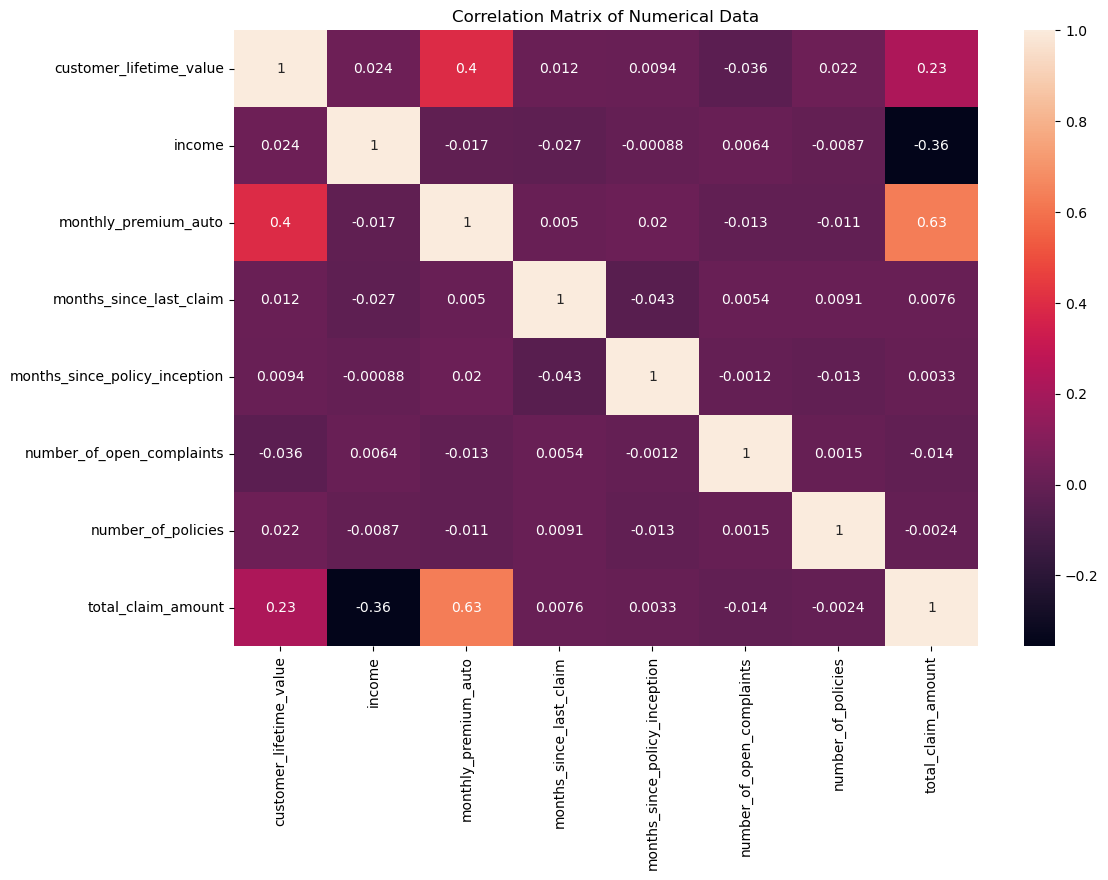

In [22]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Data')
plt.show()

# Create a function to plot every discrete variable. Do the same with the continuous variables 
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [23]:
def plot_continuous_variables(df):
    for col in df.columns:
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

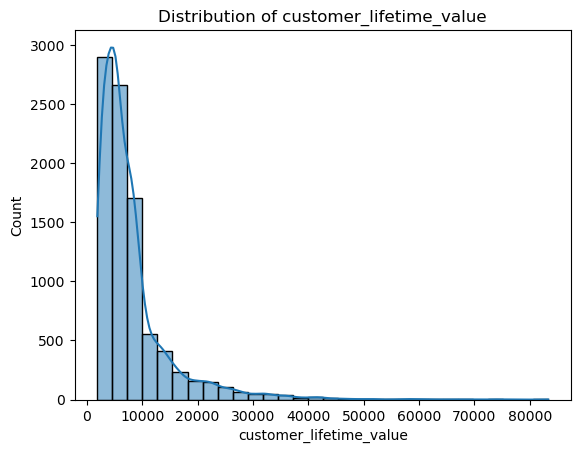

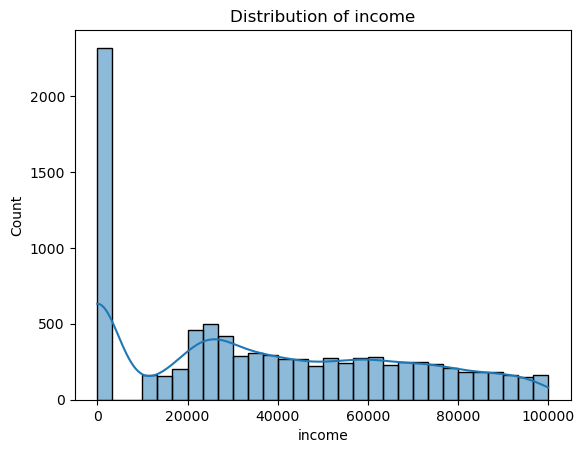

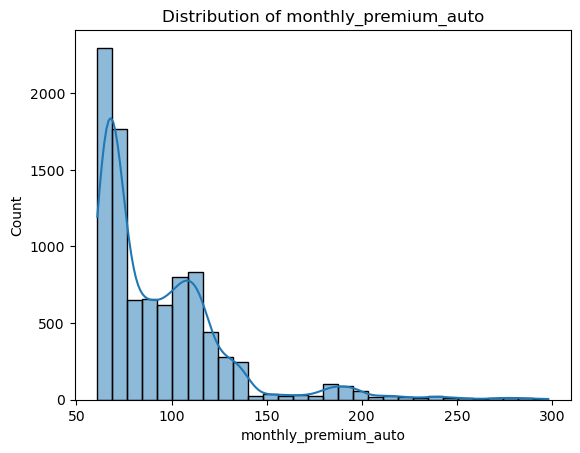

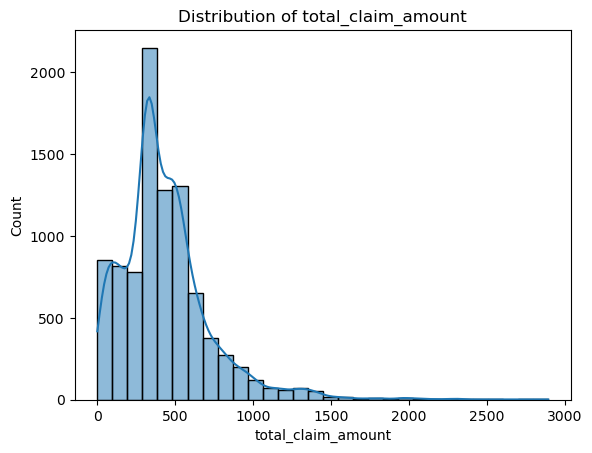

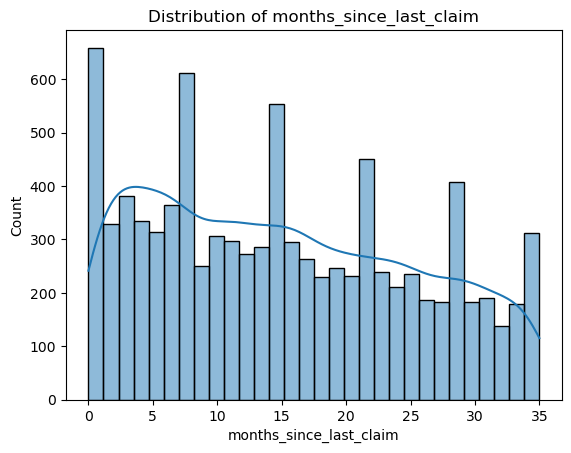

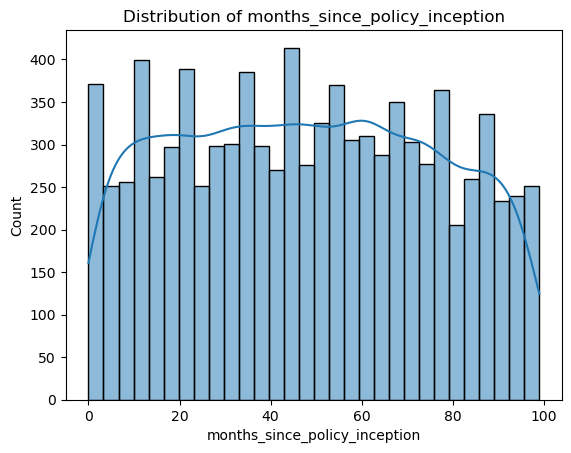

In [24]:
plot_continuous_variables(continuous_df)

In [25]:
def plot_discrete_variables(df):
    for col in df.columns:
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

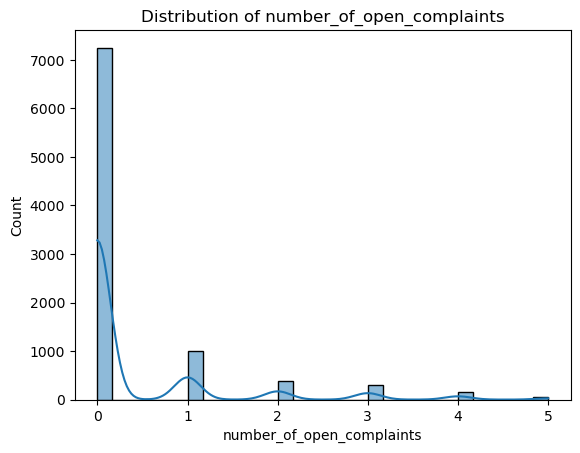

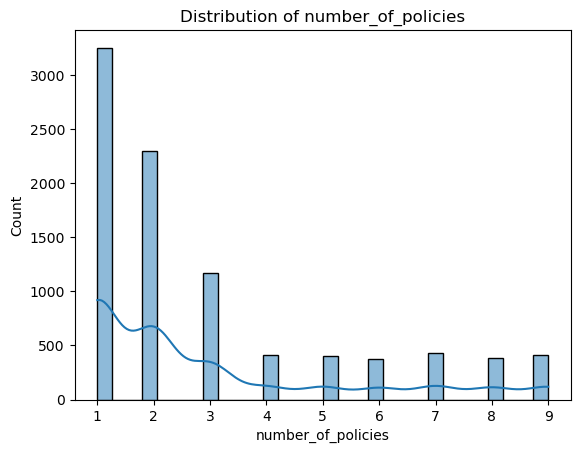

In [26]:
plot_continuous_variables(discrete_df)

# Look for outliers in the continuous variables. 
(HINT: There’s a good plot to do that!)

In [27]:
def plot_continuous_variables(df):
    for col in df.columns:
        sns.boxplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

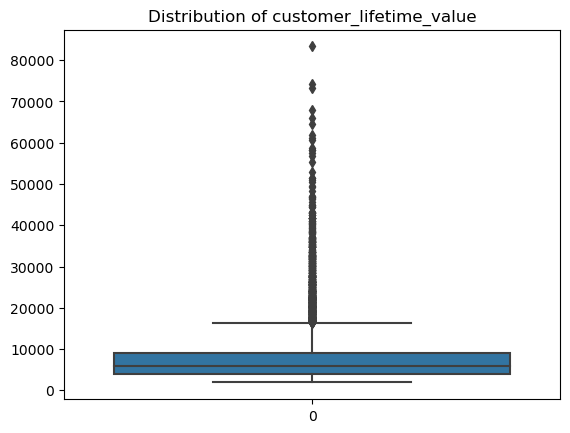

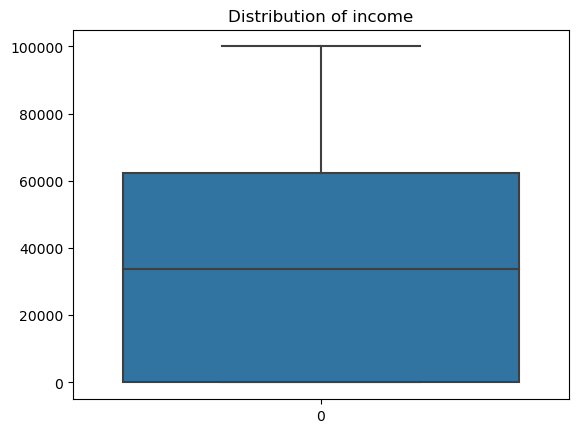

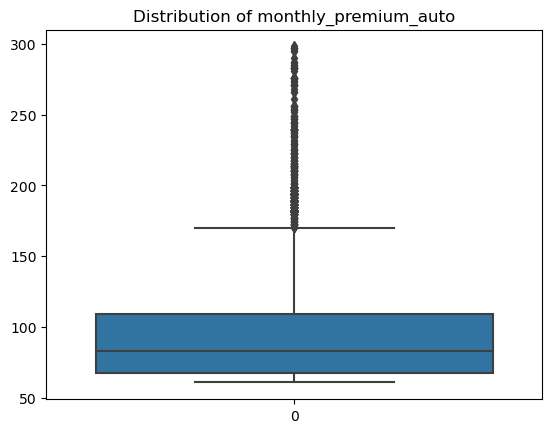

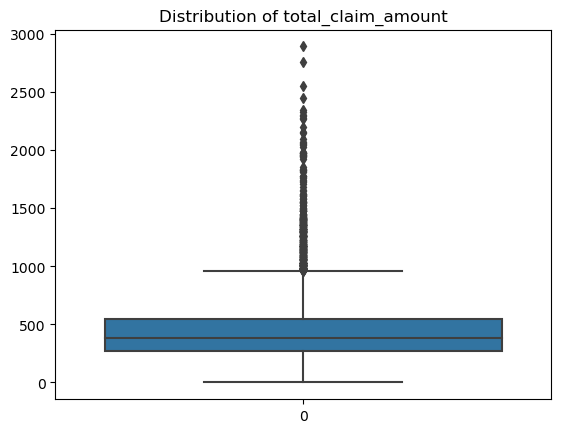

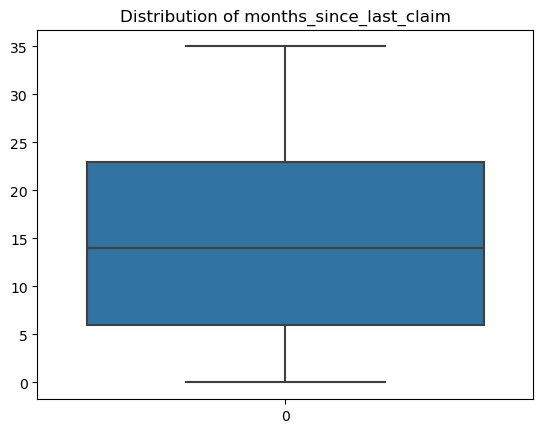

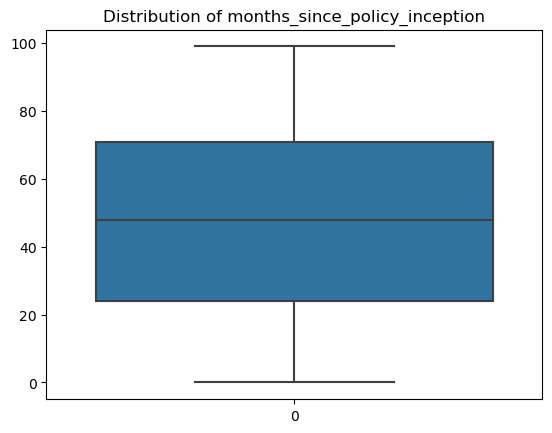

In [28]:
plot_continuous_variables(continuous_df)

# Did you find outliers? 
Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [29]:
iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)

16414.039911750002


817

In [30]:
continuous_df = continuous_df[continuous_df['customer_lifetime_value'] <= upper_limit]
print(continuous_df.shape)

(8317, 6)


In [31]:
iqr = np.nanpercentile(continuous_df['monthly_premium_auto'],75) - np.nanpercentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

165.5


In [32]:
continuous_df = continuous_df[continuous_df['monthly_premium_auto'] <= upper_limit]
print(continuous_df.shape)

(8016, 6)


# Check all columns for NaN values. 
Decide what (if anything) you will need to do with them, do that now.

In [33]:
numerical_df.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

# Cleaning categorical data



# Find all of the categorical data. 
Save it in a categorical_df variable.

In [34]:
categorical_df  = customer_df.select_dtypes(object)
categorical_df.head(10)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


# Check for NaN values and decide what to do with them, do it now.

In [35]:
categorical_df.isna().sum()/len(categorical_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

# Check all unique values of columns.

In [36]:
columns_to_display = ['state', 'response', 'coverage', 'education', 'employmentstatus',
                       'gender', 'location_code', 'marital_status', 'policy_type',
                       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']

for column in columns_to_display:
    display(categorical_df[column].value_counts(dropna=False))

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

# Check dtypes. 
Do they all make sense as categorical data?

In [37]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

# Does any column contain alpha and numeric data? 
Decide how to clean it and do it now.

In [38]:
#customers, policy and renew_offer_type contains alpha numeric. I will drop the "customer" column and have cleaned the "policy" column below.

# Would you choose to do anything else to clean or wrangle the categorical data? 
Comment your decisions and do it now.

In [39]:
categorical_df['education'] = categorical_df['education'].fillna('Bachelor')
categorical_df['education'] = np.where(categorical_df['education'].isin(['College','High School or Below','Bachelor']) , 'Bachelors or below', categorical_df['education'])
categorical_df['education'].value_counts()

education
Bachelors or below    8051
Master                 741
Doctor                 342
Name: count, dtype: int64

In [40]:
categorical_df['education'] = categorical_df['education'].fillna('Master')
categorical_df['education'] = np.where(categorical_df['education'].isin(['Doctor','Master']) , 'Masters or above', categorical_df['education'])
categorical_df['education'].value_counts()

education
Bachelors or below    8051
Masters or above      1083
Name: count, dtype: int64

In [41]:
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].fillna('Unemployed')
categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Medical Leave','Disabled', 'Retired']) , 'Unemployed', categorical_df['employmentstatus'])
categorical_df['employmentstatus'].value_counts()

employmentstatus
Employed      5698
Unemployed    3436
Name: count, dtype: int64

In [42]:
categorical_df['marital_status'] = categorical_df['marital_status'].fillna('Single')
categorical_df['marital_status'] = np.where(categorical_df['marital_status'].isin(['Divorced']), 'Single', categorical_df['marital_status'])
categorical_df['marital_status'].value_counts()

marital_status
Married    5298
Single     3836
Name: count, dtype: int64

In [43]:
conditions = [
    categorical_df['policy'].str.contains('Personal'),
    categorical_df['policy'].str.contains('Corporate'),
    categorical_df['policy'].str.contains('Special')
]

choices = ['Personal', 'Corporate', 'Special']

categorical_df['policy'] = np.select(conditions,choices, default=categorical_df['policy'])
categorical_df['policy'].value_counts()

policy
Personal     6788
Corporate    1968
Special       378
Name: count, dtype: int64

In [44]:
categorical_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

In [45]:
conditions = [
    categorical_df['vehicle_class'].str.contains('Four-Door Car|Two-Door Car|SUV'),
    categorical_df['vehicle_class'].str.contains('Sports Car|Luxury SUV|Luxury Car')
]

choices = ['Standard', 'Luxury']

categorical_df['vehicle_class'] = np.select(conditions, choices, default='Other')
categorical_df['vehicle_class'].value_counts()

vehicle_class
Standard    8487
Luxury       647
Name: count, dtype: int64

# Compare policy_type and policy. 
What information is contained in these columns. Can you identify what is important?

In [46]:
display(categorical_df[['policy_type', 'policy']].head())

,policy_type,policy
0,Corporate Auto,Corporate
1,Personal Auto,Personal
2,Personal Auto,Personal
3,Corporate Auto,Corporate
4,Personal Auto,Personal


In [47]:
# As we can see that policy_type and policy contains the same data and provides the same information. 
# As we have already cleaned policy column, we will keep it and drop policy_type.

In [48]:
categorical_df = categorical_df.drop('policy_type', axis=1)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelors or below,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Standard,Medsize
1,QZ44356,Arizona,No,Extended,Bachelors or below,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Standard,Medsize
2,AI49188,Nevada,No,Premium,Bachelors or below,Employed,F,Suburban,Married,Personal,Offer1,Agent,Standard,Medsize
3,WW63253,California,No,Basic,Bachelors or below,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,Standard,Medsize
4,HB64268,Washington,No,Basic,Bachelors or below,Employed,M,Rural,Single,Personal,Offer1,Agent,Standard,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelors or below,Employed,M,Urban,Married,Personal,Offer2,Web,Standard,Medsize
9130,PK87824,California,Yes,Extended,Bachelors or below,Employed,F,Suburban,Single,Corporate,Offer1,Branch,Standard,Medsize
9131,TD14365,California,No,Extended,Bachelors or below,Unemployed,M,Suburban,Single,Corporate,Offer1,Branch,Standard,Medsize
9132,UP19263,California,No,Extended,Bachelors or below,Employed,M,Suburban,Married,Personal,Offer3,Branch,Standard,Large


# Feature Extraction

Plot all the categorical variables with the proper plot.
What can you see? There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? Make any changes you feel are necessary.

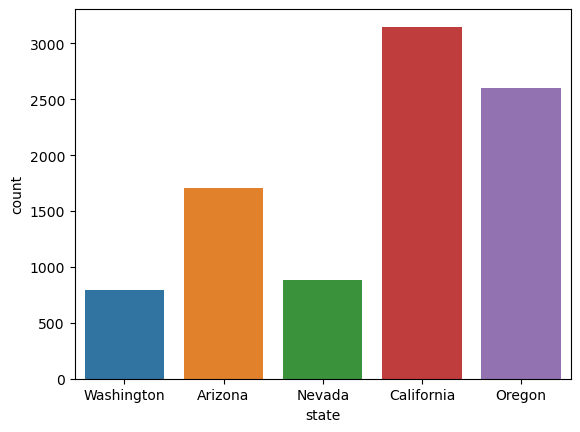

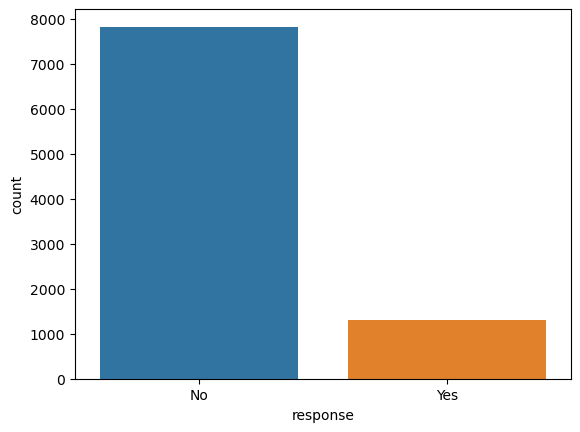

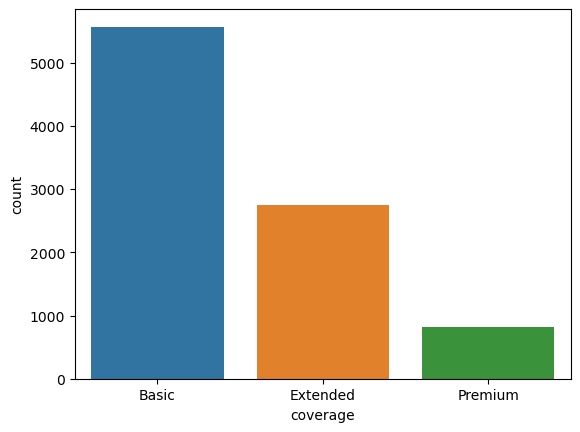

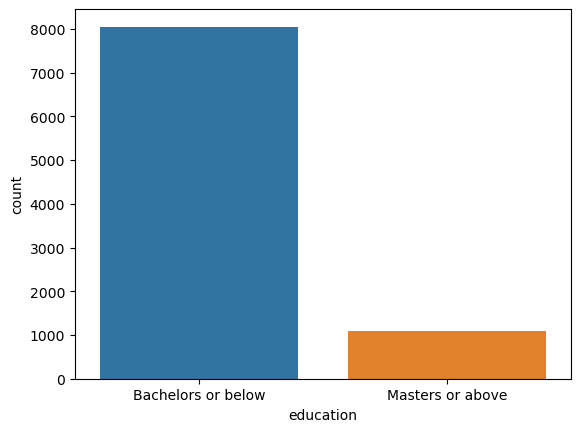

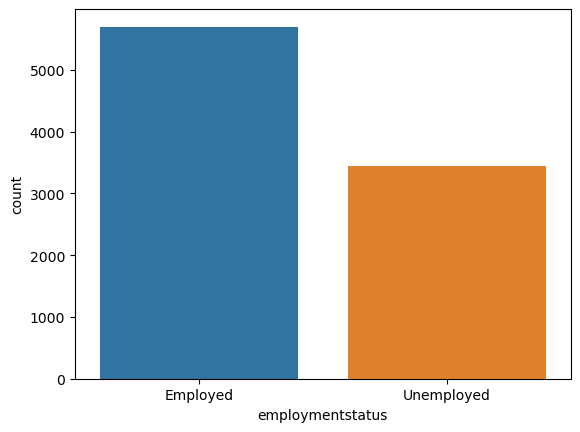

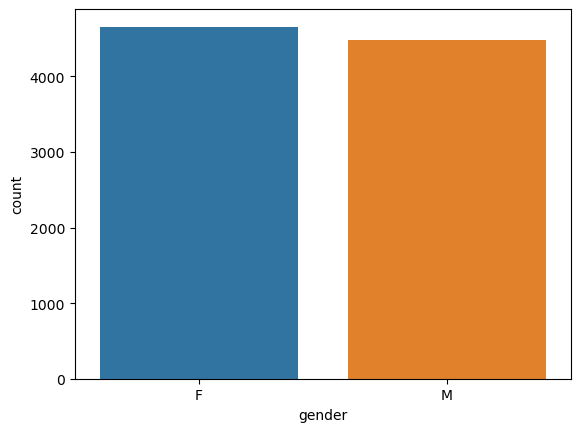

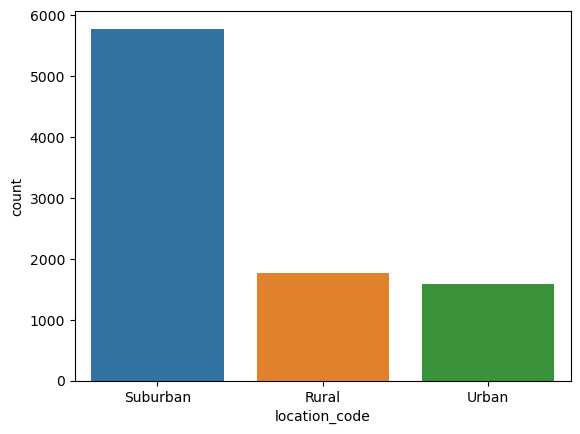

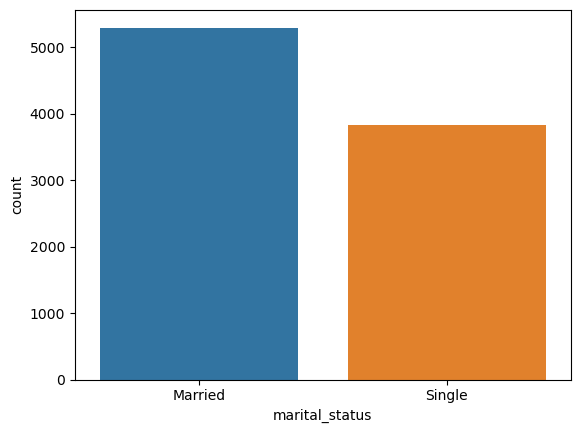

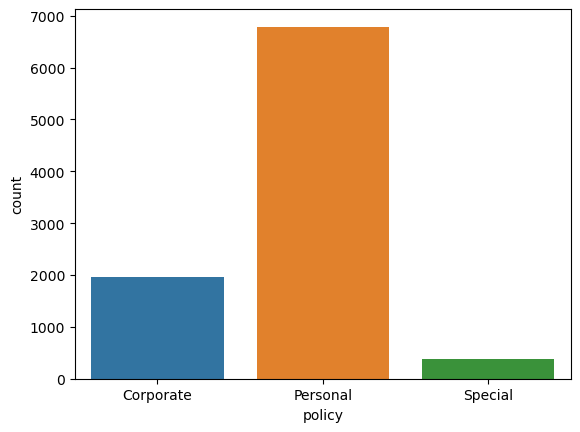

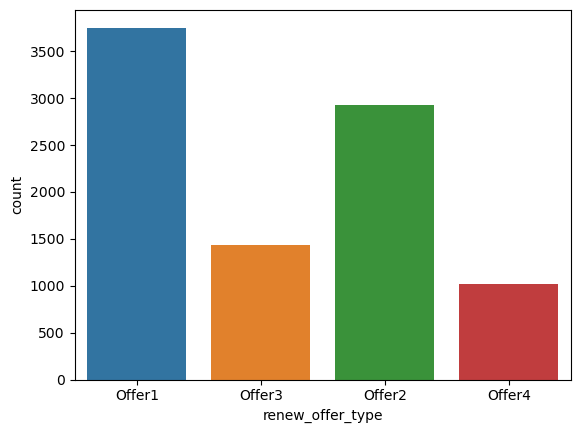

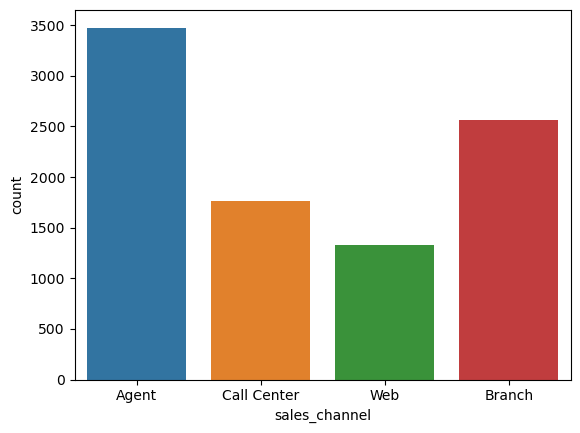

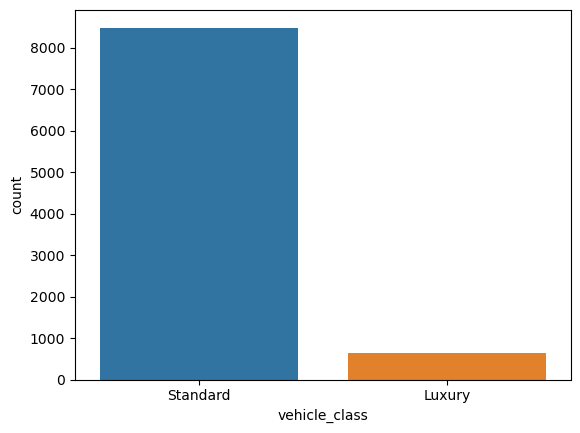

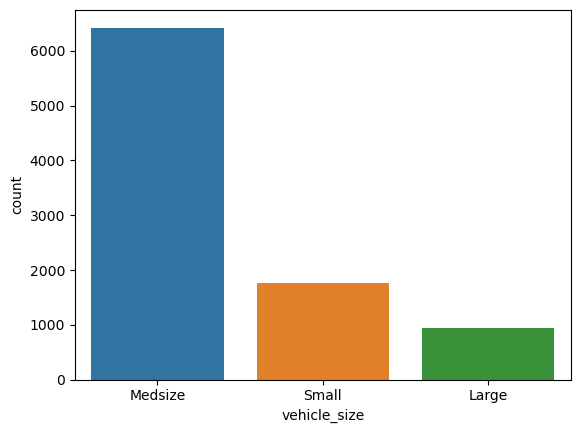

In [49]:
categorical_df_2 = categorical_df.drop(['customer'], axis=1)

for column in categorical_df_2.columns:
        sns.countplot(x=column, data=categorical_df)
        
        plt.show()

# Plot time variable.
Can you extract something from it? The time variable can be useful. You shoud transform its data into a more useful form. 
Hint: Day, week, and month as integers might be useful.

In [50]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%d,%m,%Y')

In [59]:
customer_df['Day'] = customer_df['effective_to_date'].dt.strftime('%d').astype(int)
customer_df['Week'] = customer_df['effective_to_date'].dt.strftime('%U').astype(int) + 1  # Adding 1 to make weeks start from 1
customer_df['Month'] = customer_df['effective_to_date'].dt.strftime('%m').astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

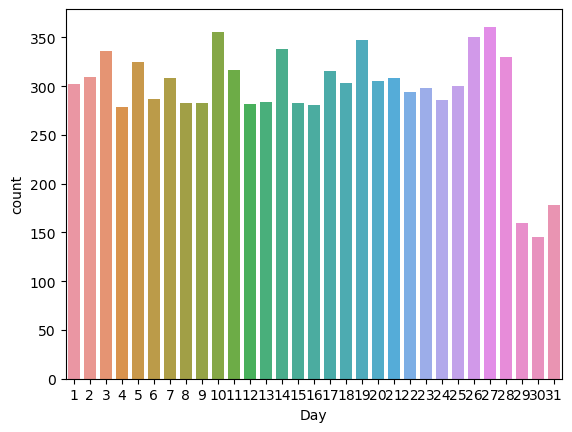

In [106]:
sns.countplot(data=customer_df, x='Day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

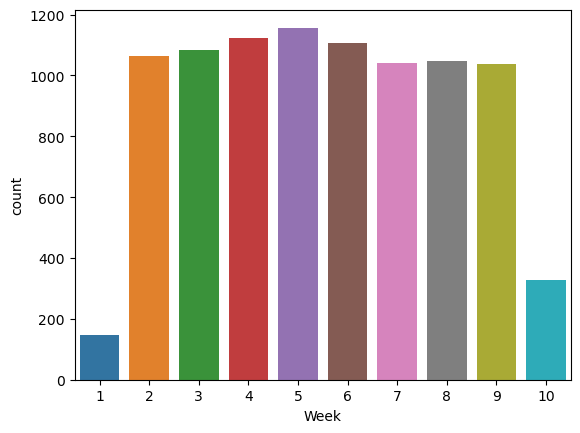

In [107]:
sns.countplot(data=customer_df, x='Week')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

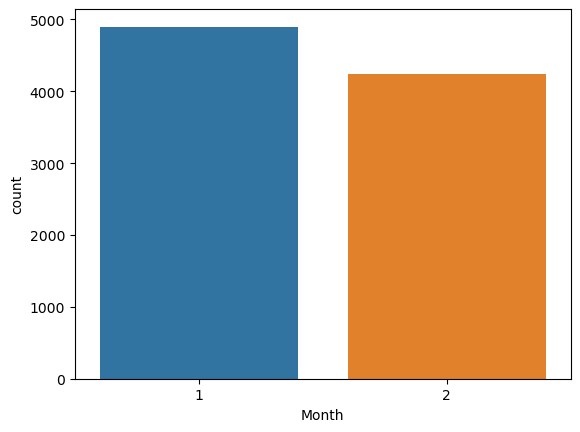

In [108]:
sns.countplot(data=customer_df, x='Month')
plt.show